In [1]:
from os import path
import bz2
import pandas as pd

In [2]:
fname = 'taxi.csv.bz2'

In [3]:
path.getsize(fname) / (1<<20)

2.7408742904663086

In [4]:
with bz2.open(fname) as fp:
    print(sum(1 for line in fp))

100001


In [5]:
with bz2.open(fname, 'rt') as fp:
    for lnum, line in enumerate(fp):
        print(line[:-1])
        if lnum > 4:
            break

VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type 
2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992240905761719,40.690120697021484,-73.999664306640625,40.684993743896484,2,.71,4.5,0,0.5,0,0,,0.3,5.3,2,1,,
2,2015-03-22 17:36:49,2015-03-22 17:45:39,N,5,-73.930038452148438,40.819576263427734,-73.907173156738281,40.811305999755859,2,1.41,12,0,0,0,0,,0,12,2,2,,
2,2015-03-25 22:08:45,2015-03-25 22:53:29,N,1,-73.961082458496094,40.807022094726563,-73.984642028808594,40.66314697265625,1,14.36,45,0.5,0.5,9.26,0,,0.3,55.56,1,1,,
2,2015-03-16 13:45:20,2015-03-16 13:52:04,N,1,-73.913200378417969,40.777961730957031,-73.926994323730469,40.772743225097656,2,1.05,6.5,0,0.5,0,0,,0.3,7.3,2,1,,
2,2015-03-19 18:53:50,2015-03-19 18:59:04,N,1,-73.925888061523

In [6]:
df = pd.read_csv(fname)

In [7]:
len(df)

100000

In [8]:
df.iloc[0]

VendorID                 2015-03-04 15:42:30
lpep_pickup_datetime                       N
Lpep_dropoff_datetime                      1
Store_and_fwd_flag                  -73.9922
RateCodeID                           40.6901
Pickup_longitude                    -73.9997
Pickup_latitude                       40.685
Dropoff_longitude                          2
Dropoff_latitude                        0.71
Passenger_count                          4.5
Trip_distance                              0
Fare_amount                              0.5
Extra                                      0
MTA_tax                                    0
Tip_amount                               NaN
Tolls_amount                             0.3
Ehail_fee                                5.3
improvement_surcharge                      2
Total_amount                               1
Payment_type                             NaN
Trip_type                                NaN
Name: (2, 2015-03-04 15:39:16), dtype: object

In [9]:
with bz2.open(fname, 'rt') as fp:
    header = fp.readline()
    data = fp.readline()
    
print(header)
print(data)

VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type 

2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992240905761719,40.690120697021484,-73.999664306640625,40.684993743896484,2,.71,4.5,0,0.5,0,0,,0.3,5.3,2,1,,



In [10]:
len(header.split(','))

21

In [11]:
len(data.split(','))

23

In [12]:
import numpy as np
df = pd.read_csv(fname, usecols=np.arange(21))

In [13]:
df.iloc[0]

VendorID                                   2
lpep_pickup_datetime     2015-03-04 15:39:16
Lpep_dropoff_datetime    2015-03-04 15:42:30
Store_and_fwd_flag                         N
RateCodeID                                 1
Pickup_longitude                    -73.9922
Pickup_latitude                      40.6901
Dropoff_longitude                   -73.9997
Dropoff_latitude                      40.685
Passenger_count                            2
Trip_distance                           0.71
Fare_amount                              4.5
Extra                                      0
MTA_tax                                  0.5
Tip_amount                                 0
Tolls_amount                               0
Ehail_fee                                NaN
improvement_surcharge                    0.3
Total_amount                             5.3
Payment_type                               2
Trip_type                                  1
Name: 0, dtype: object

In [14]:
df.dtypes

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                  int64
dtype: object

In [15]:
df = pd.read_csv(fname, usecols=np.arange(21), parse_dates=['lpep_pickup_datetime', 'Lpep_dropoff_datetime'])

In [16]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

In [17]:
df['VendorID'].unique()

array([2, 1])

In [18]:
df['Vendor'] = df['VendorID'].apply({1: 'Creative', 2: 'VeriFone'}.get)
df['Vendor'].head()

0    VeriFone
1    VeriFone
2    VeriFone
3    VeriFone
4    VeriFone
Name: Vendor, dtype: object

In [19]:
df['Vendor'].memory_usage() / (1<<20)

0.7630157470703125

In [20]:
df['Vendor'] = df['VendorID'].apply({1: 'Creative', 2: 'VeriFone'}.get).astype('category')

In [21]:
df['Vendor'].memory_usage() / (1<<20)

0.095458984375

In [22]:
df['Vendor'].head().cat.codes

0    1
1    1
2    1
3    1
4    1
dtype: int8

In [23]:
len(df[df['Vendor'] == 'VeriFone'])

77946

In [24]:
df['lpep_pickup_datetime'].head().dt.round('H')

0   2015-03-04 16:00:00
1   2015-03-22 18:00:00
2   2015-03-25 22:00:00
3   2015-03-16 14:00:00
4   2015-03-19 19:00:00
Name: lpep_pickup_datetime, dtype: datetime64[ns]

In [25]:
keys = df['lpep_pickup_datetime'].dt.round('H')
df.groupby(keys)

In [26]:
df.groupby(keys).count().head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,Vendor
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2015-03-01 00:00:00,153,153,153,153,153,153,153,153,153,153,...,153,153,153,153,0,153,153,153,153,153
2015-03-01 01:00:00,266,266,266,266,266,266,266,266,266,266,...,266,266,266,266,0,266,266,266,266,266
2015-03-01 02:00:00,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,0,241,241,241,241,241
2015-03-01 03:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,0,180,180,180,180,180
2015-03-01 04:00:00,172,172,172,172,172,172,172,172,172,172,...,172,172,172,172,0,172,172,172,172,172


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

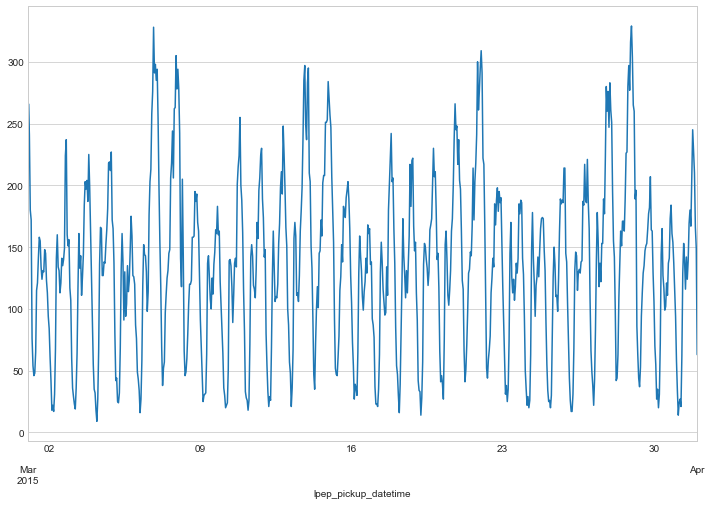

In [28]:
df.groupby(keys).count()['Vendor'].plot()

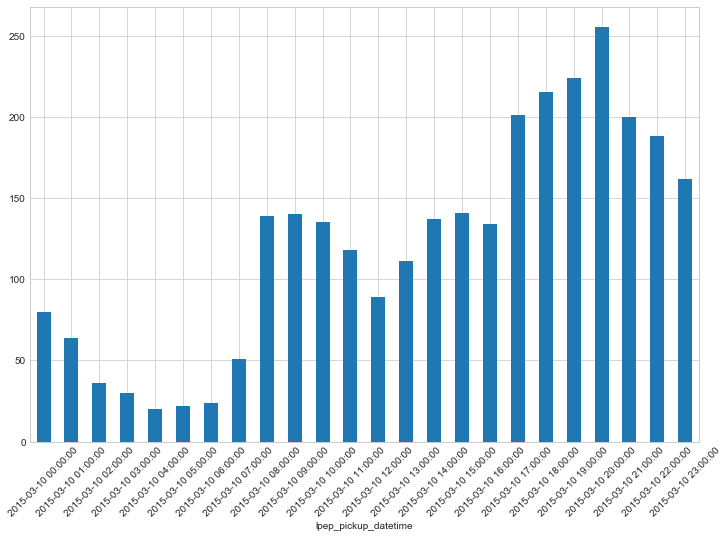

In [29]:
df.groupby(keys).count()['Vendor'].loc['2015-03-10'].plot.bar(rot=45)